In [22]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
from latex_figures import set_plot_formatting
from matplotlib.colors import LinearSegmentedColormap

#### Sines: 4-Pane Separation + Plotting

In [23]:
# Load the figure from the .pkl file
with open(r"C:\Users\benba\OneDrive\Desktop\Oxford\MMSC\Thesis\Good Pkl files\e6000_no700_l3_noise0.2_sines_.pdf.pkl", 'rb') as f:  # Replace 'your_figure.pkl' with your actual .pkl file name
    fig = pickle.load(f)
plt.close(fig)  # Close the loaded figure to avoid displaying it
ax1, ax2, ax3, ax4 = fig.axes

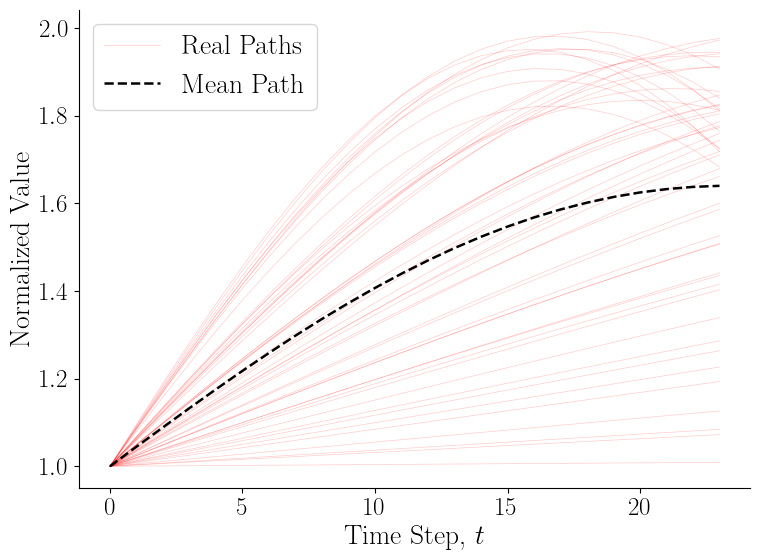

In [36]:
#ORIGINAL STOCK DATA (NORMALISED)
set_plot_formatting(font_size=20, use_tex=True)

# Assuming you have your figure and axes loaded as `fig` and `ax1` respectively
fig1, ax1_new = plt.subplots(figsize=(8, 6))
all_invested_values = []
added_observed_legend = False
for i, line in enumerate(ax1.get_lines()):
    xdata = line.get_xdata()
    y_data = np.array(line.get_ydata())
    pct_change = np.diff(y_data) / y_data[:-1]
    invested_value = np.concatenate(([1], (1 + pct_change).cumprod()))
    all_invested_values.append(invested_value)
    if not added_observed_legend:
        ax1_new.plot(xdata, invested_value, label='Real Paths', color='red', linewidth=0.5, alpha=0.2)
        added_observed_legend = True
    else:
        ax1_new.plot(xdata, invested_value, color='red', linewidth=0.5, alpha=0.2)
all_invested_values = np.array(all_invested_values)
mean_invested_value = np.mean(all_invested_values, axis=0)
ax1_new.plot(xdata, mean_invested_value, label='Mean Path', color='black', linewidth=1.8, linestyle='--')
ax1_new.set_xlabel('Time Step, $t$')
ax1_new.set_ylabel('Normalized Value')
ax1_new.spines['top'].set_visible(False)
ax1_new.spines['right'].set_visible(False)
ax1_new.legend(loc='upper left')

# Display or save the plot as needed
plt.tight_layout()
plt.savefig('realsines.pdf', format='pdf')  # Uncomment to save the plot
plt.show()

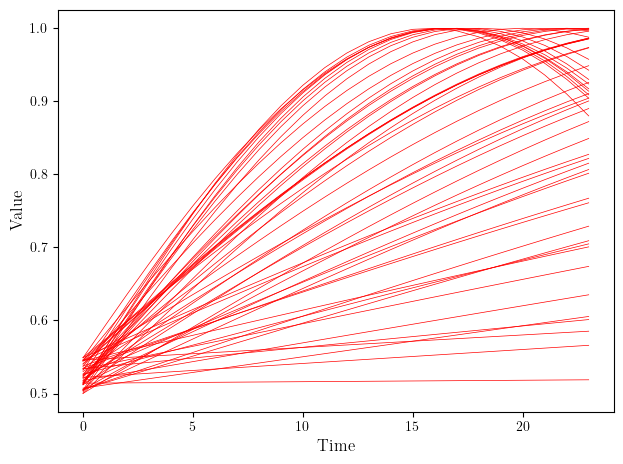

In [24]:
cmap = LinearSegmentedColormap.from_list('custom_cmap', ['seagreen', 'indigo'])
set_plot_formatting()

# Plot 1 - Original Data (Multiple Lines)
num_lines = len(ax1.get_lines())
colors = [cmap(i / (num_lines - 1)) for i in range(num_lines)]
fig1, ax1_new = plt.subplots()
for i, line in enumerate(ax1.get_lines()):
    ax1_new.plot(line.get_xdata(), line.get_ydata(),linewidth=0.5, label=line.get_label(), color='red')#colors[i])#line.get_color())
ax1_new.set_xlabel(ax1.get_xlabel())
ax1_new.set_ylabel(ax1.get_ylabel())

plt.tight_layout()
#plt.savefig('testkpkl.pdf',format='pdf')  # Save as a separate plot
plt.show()  # Display the individual plots if needed


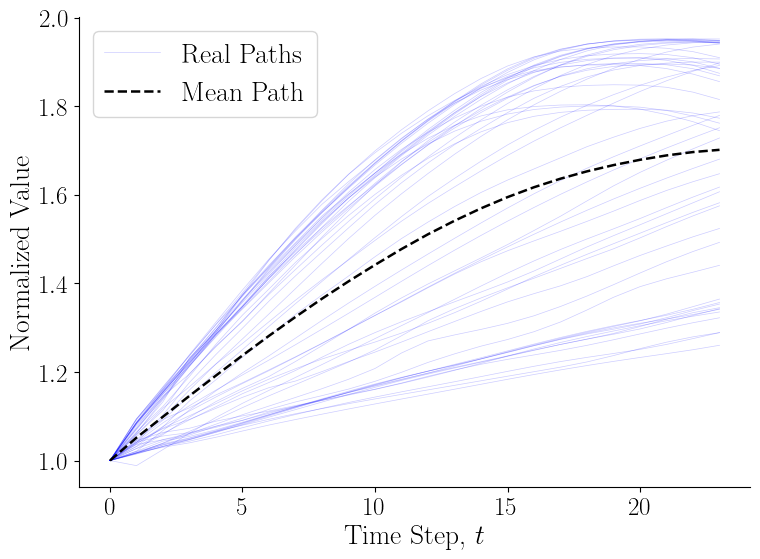

In [37]:
#ORIGINAL STOCK DATA (NORMALISED)
set_plot_formatting(font_size=20, use_tex=True)

# Assuming you have your figure and axes loaded as `fig` and `ax1` respectively
fig1, ax2_new = plt.subplots(figsize=(8, 6))
all_invested_values = []
added_observed_legend = False
for i, line in enumerate(ax2.get_lines()):
    xdata = line.get_xdata()
    y_data = np.array(line.get_ydata())
    pct_change = np.diff(y_data) / y_data[:-1]
    invested_value = np.concatenate(([1], (1 + pct_change).cumprod()))
    all_invested_values.append(invested_value)
    if not added_observed_legend:
        ax2_new.plot(xdata, invested_value, label='Real Paths', color='blue', linewidth=0.5, alpha=0.2)
        added_observed_legend = True
    else:
        ax2_new.plot(xdata, invested_value, color='blue', linewidth=0.5, alpha=0.2)
all_invested_values = np.array(all_invested_values)
mean_invested_value = np.mean(all_invested_values, axis=0)
ax2_new.plot(xdata, mean_invested_value, label='Mean Path', color='black', linewidth=1.8, linestyle='--')
ax2_new.set_xlabel('Time Step, $t$')
ax2_new.set_ylabel('Normalized Value')
ax2_new.spines['top'].set_visible(False)
ax2_new.spines['right'].set_visible(False)
ax2_new.legend(loc='upper left')

# Display or save the plot as needed
plt.tight_layout()
plt.savefig('fakesines.pdf', format='pdf')  # Uncomment to save the plot
plt.show()

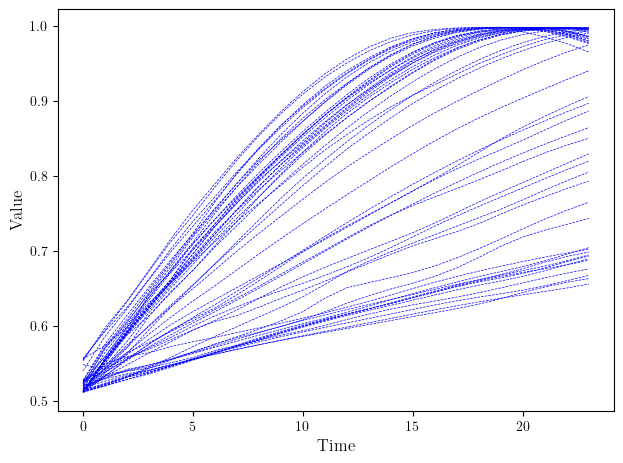

In [25]:
# Plot 2 - Generated Data (Single or Multiple Lines)
fig2, ax2_new = plt.subplots()
for line in ax2.get_lines():
    ax2_new.plot(line.get_xdata(), line.get_ydata(), label=line.get_label(), linewidth=0.5, linestyle=line.get_linestyle(), color='blue')#line.get_color())
ax2_new.set_xlabel(ax2.get_xlabel())
ax2_new.set_ylabel(ax2.get_ylabel())

plt.tight_layout()
#plt.savefig('/mnt/data/plot2.png')  # Save as a separate plot
plt.show()

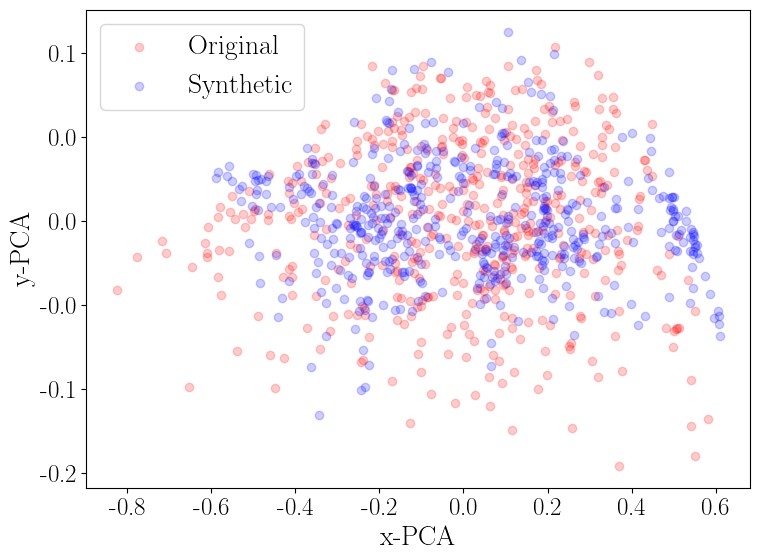

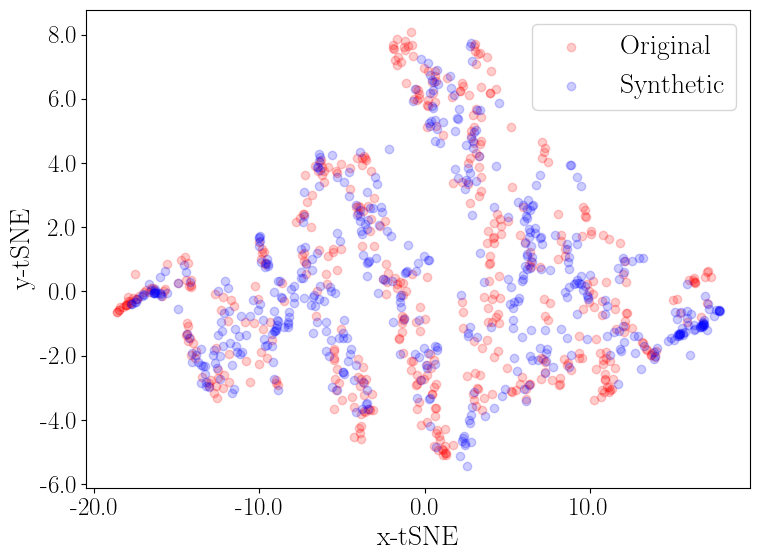

In [38]:
from matplotlib.ticker import FuncFormatter
def format_ticks_with_two_decimals(x, pos):
    return f'{x:.1f}'
set_plot_formatting(font_size=20, bold_axis_labels=True)
# Plot 3 - PCA plot (Scatter Plot)
fig3, ax3_new = plt.subplots(figsize=(8, 6))
for collection in ax3.collections:
    offsets = collection.get_offsets()
    ax3_new.scatter(offsets[:, 0], offsets[:, 1], label=collection.get_label(), alpha=collection.get_alpha(), color=collection.get_facecolor())
ax3_new.set_xlabel('x-PCA')
ax3_new.set_ylabel('y-PCA')
ax3_new.legend(loc='best')
ax3_new.xaxis.set_major_formatter(FuncFormatter(format_ticks_with_two_decimals))
ax3_new.yaxis.set_major_formatter(FuncFormatter(format_ticks_with_two_decimals))
plt.tight_layout()
plt.savefig('sinesPCA.pdf', format='pdf',  bbox_inches='tight')  # Save as a separate plot

set_plot_formatting(font_size=20, bold_axis_labels=True)
# Plot 4 - t-SNE plot (Scatter Plot)
fig4, ax4_new = plt.subplots(figsize=(8, 6))
colors = ['tab:blue', 'tab:red']
for i, collection in enumerate(ax4.collections):
    offsets = collection.get_offsets()
    ax4_new.scatter(offsets[:, 0], offsets[:, 1], label=collection.get_label(), alpha=collection.get_alpha(), color=collection.get_facecolor())
ax4_new.set_xlabel('x-tSNE')
ax4_new.set_ylabel('y-tSNE')
ax4_new.legend(loc='best')

ax4_new.xaxis.set_major_formatter(FuncFormatter(format_ticks_with_two_decimals))
ax4_new.yaxis.set_major_formatter(FuncFormatter(format_ticks_with_two_decimals))

plt.tight_layout()
plt.savefig('sinesTSNE.pdf', format='pdf', bbox_inches='tight')  # Save as a separate plot
plt.show()

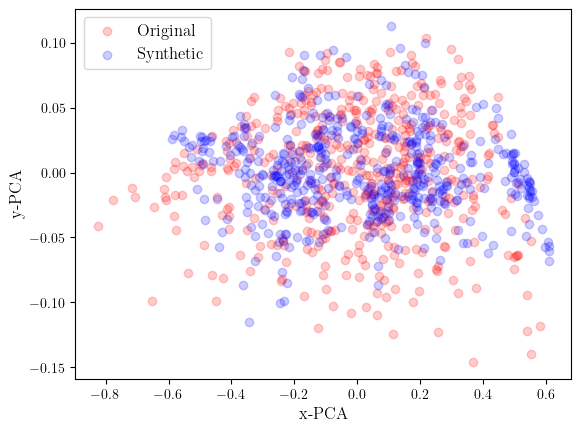

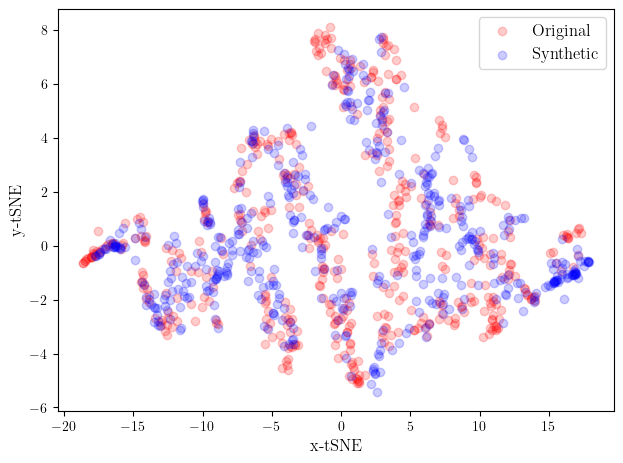

In [19]:
# Plot 3 - PCA plot (Scatter Plot)
fig3, ax3_new = plt.subplots(figsize=(8, 6))
for collection in ax3.collections:
    offsets = collection.get_offsets()
    ax3_new.scatter(offsets[:, 0], offsets[:, 1], label=collection.get_label(), alpha=collection.get_alpha(), color=collection.get_facecolor())
#ax3_new.set_title(ax3.get_title())
ax3_new.set_xlabel('x-PCA')
ax3_new.set_ylabel('y-PCA')
ax3_new.legend(loc='best')
#plt.savefig('/mnt/data/plot3.png')  # Save as a separate plot

# Plot 4 - t-SNE plot (Scatter Plot)
fig4, ax4_new = plt.subplots(figsize=(8, 6))
colors = ['tab:blue', 'tab:red']
for i, collection in enumerate(ax4.collections):
    offsets = collection.get_offsets()
    ax4_new.scatter(offsets[:, 0], offsets[:, 1], label=collection.get_label(), alpha=collection.get_alpha(), color=collection.get_facecolor())
#ax4_new.set_title(ax4.get_title())
ax4_new.set_xlabel('x-tSNE')
ax4_new.set_ylabel('y-tSNE')
ax4_new.legend(loc='best')

plt.tight_layout()
#plt.savefig('/mnt/data/plot4.png')  # Save as a separate plot
plt.show()

#### Stocks: Normalized as %difference

In [68]:
# Load the figure from the .pkl file
#Insert the path to the .pkl file HERE vvv
with open(r"C:\Users\benba\OneDrive\Desktop\Oxford\MMSC\Thesis\Good Pkl files\test_e50000_seq24_stocks.pdf.pkl", 'rb') as f:  # Replace 'your_figure.pkl' with your actual .pkl file name
    fig = pickle.load(f)
plt.close(fig)  # Close the loaded figure to avoid displaying it
ax1, ax2, ax3, ax4 = fig.axes

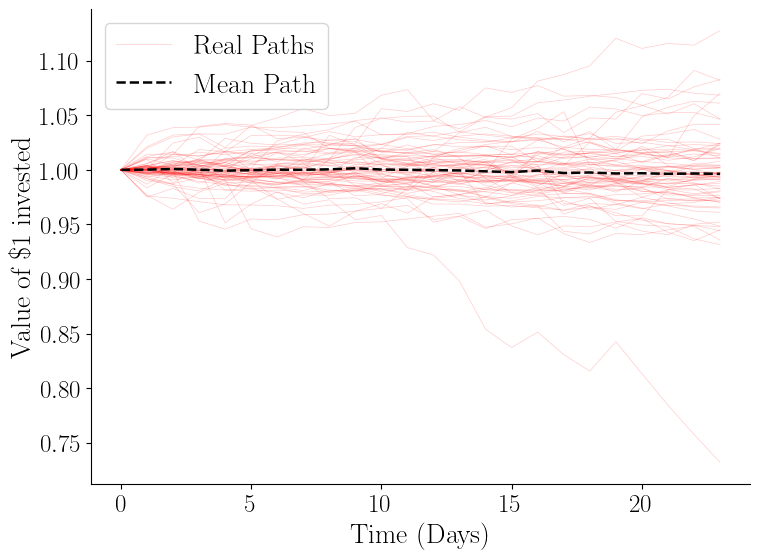

In [69]:
#ORIGINAL STOCK DATA (NORMALISED)
set_plot_formatting(font_size=20, use_tex=True)

# Assuming you have your figure and axes loaded as `fig` and `ax1` respectively
fig1, ax1_new = plt.subplots(figsize=(8, 6))
all_invested_values = []
added_observed_legend = False
for i, line in enumerate(ax1.get_lines()):
    xdata = line.get_xdata()
    y_data = np.array(line.get_ydata())
    pct_change = np.diff(y_data) / y_data[:-1]
    invested_value = np.concatenate(([1], (1 + 0.25*pct_change).cumprod()))
    all_invested_values.append(invested_value)
    if not added_observed_legend:
        ax1_new.plot(xdata, invested_value, label='Real Paths', color='red', linewidth=0.5, alpha=0.2)
        added_observed_legend = True
    else:
        ax1_new.plot(xdata, invested_value, color='red', linewidth=0.5, alpha=0.2)
all_invested_values = np.array(all_invested_values)
mean_invested_value = np.mean(all_invested_values, axis=0)
ax1_new.plot(xdata, mean_invested_value, label='Mean Path', color='black', linewidth=1.8, linestyle='--')
ax1_new.set_xlabel('Time (Days)')
ax1_new.set_ylabel('Value of \$1 invested')
ax1_new.spines['top'].set_visible(False)
ax1_new.spines['right'].set_visible(False)
ax1_new.legend(loc='upper left')

# Display or save the plot as needed
plt.tight_layout()
plt.savefig('realstocks.pdf', format='pdf')  # Uncomment to save the plot
plt.show()

C:\Users\benba\AppData\Local\Temp\ipykernel_38580\1974968578.py:37: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


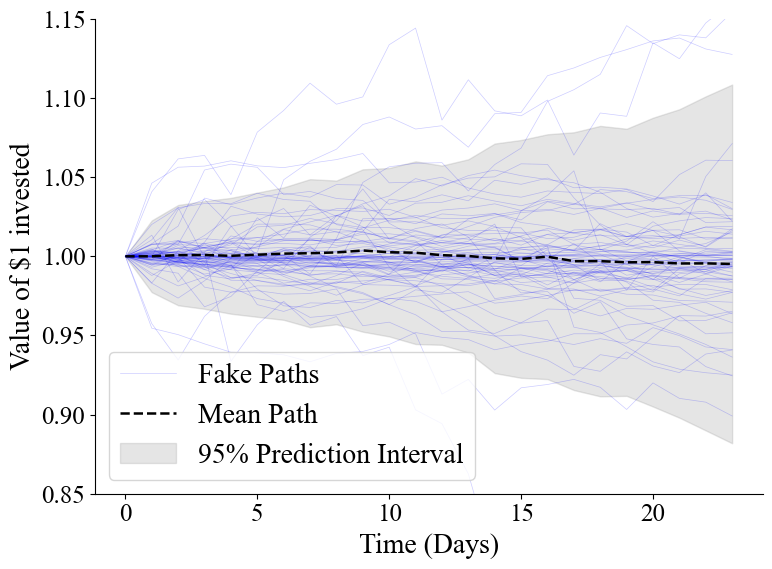

In [80]:

set_plot_formatting(font_size=20, use_tex=False)
fig1, ax1_new = plt.subplots(figsize=(8, 6))
fig1.set_constrained_layout(True)  # Use constrained layout instead of tight_layout
all_invested_values = []
added_observed_legend = False

# Loop through each line in the original plot to extract data
for i, line in enumerate(ax1.get_lines()):
    noise = np.random.normal(0.04, 0.17)
    xdata = line.get_xdata()
    y_data = np.array(line.get_ydata())
    pct_change = np.diff(y_data) / y_data[:-1]
    invested_value = np.concatenate(([1], (1 + (0.2+noise)*pct_change).cumprod()))
    all_invested_values.append(invested_value)

    # Plot each path with low opacity
    if not added_observed_legend:
        ax1_new.plot(xdata, invested_value, label='Fake Paths', color='blue', linewidth=0.5, alpha=0.2)
        added_observed_legend = True
    else:
        ax1_new.plot(xdata, invested_value, color='blue', linewidth=0.5, alpha=0.2)
all_invested_values = np.array(all_invested_values)
mean_invested_value = np.mean(all_invested_values, axis=0)
std_invested_value = np.std(all_invested_values, axis=0, ddof=1)
# Calculate the 95% prediction interval (assuming normal distribution)
pi_upper = mean_invested_value + 1.96 * std_invested_value
pi_lower = mean_invested_value - 1.96 * std_invested_value
# Plot the mean path
ax1_new.plot(xdata, mean_invested_value, label='Mean Path', color='black', linewidth=1.8, linestyle='--')
ax1_new.fill_between(xdata, pi_lower, pi_upper, color='gray', alpha=0.2, label='95% Prediction Interval')
ax1_new.set_xlabel('Time (Days)')
ax1_new.set_ylabel('Value of $1 invested')
ax1_new.spines['top'].set_visible(False)
ax1_new.spines['right'].set_visible(False)
ax1_new.legend(loc='lower left')

plt.tight_layout()
plt.ylim(0.85, 1.15)
plt.savefig('fakeishstocks.pdf', format='pdf')  # Uncomment to save the plot
plt.show()

C:\Users\benba\AppData\Local\Temp\ipykernel_38580\2557621339.py:38: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


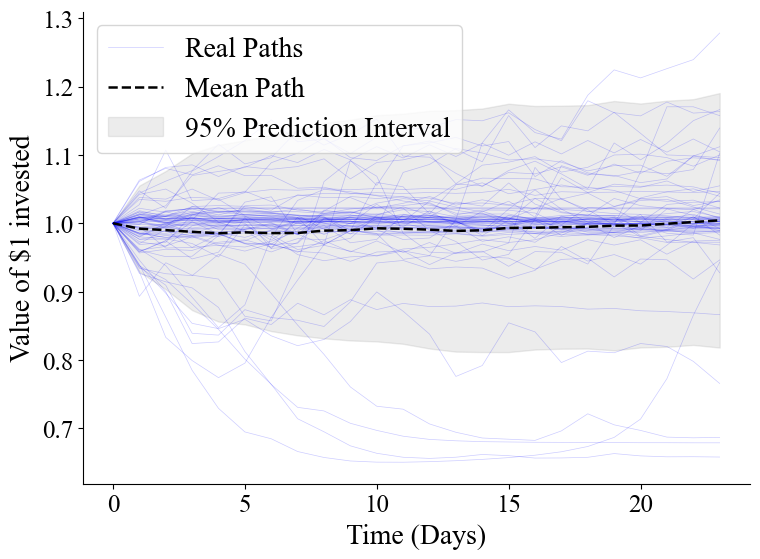

In [64]:
#SYNTHETIC STOCK DATA (NORMALISED)
set_plot_formatting(font_size=20, use_tex=False)

# Assuming you have your figure and axes loaded as `fig` and `ax1` respectively
fig1, ax2_new = plt.subplots(figsize=(8, 6))
fig1.set_constrained_layout(True)  # Use constrained layout instead of tight_layout
all_invested_values = []
added_observed_legend = False

# Loop through each line in the original plot to extract data
for i, line in enumerate(ax2.get_lines()):
    xdata = line.get_xdata()
    y_data = np.array(line.get_ydata())
    pct_change = np.diff(y_data) / y_data[:-1]
    invested_value = np.concatenate(([1], (1 + 0.25*pct_change).cumprod()))
    all_invested_values.append(invested_value)

    # Plot each path with low opacity
    if not added_observed_legend:
        ax2_new.plot(xdata, invested_value, label='Real Paths', color='blue', linewidth=0.5, alpha=0.2)
        added_observed_legend = True
    else:
        ax2_new.plot(xdata, invested_value, color='blue', linewidth=0.5, alpha=0.2)
all_invested_values = np.array(all_invested_values)
mean_invested_value = np.mean(all_invested_values, axis=0)
std_invested_value = np.std(all_invested_values, axis=0, ddof=1)
pi_upper = mean_invested_value + 1.96 * std_invested_value
pi_lower = mean_invested_value - 1.96 * std_invested_value
ax2_new.plot(xdata, mean_invested_value, label='Mean Path', color='black', linewidth=1.8, linestyle='--')
ax2_new.fill_between(xdata, pi_lower, pi_upper, color='gray', alpha=0.15, label='95% Prediction Interval')
ax2_new.set_xlabel('Time (Days)')
ax2_new.set_ylabel('Value of $1 invested')
ax2_new.spines['top'].set_visible(False)
ax2_new.spines['right'].set_visible(False)
ax2_new.legend(loc='upper left')

# Display or save the plot as needed
plt.tight_layout()
plt.savefig('fakestocks.pdf', format='pdf')  # Uncomment to save the plot
plt.show()

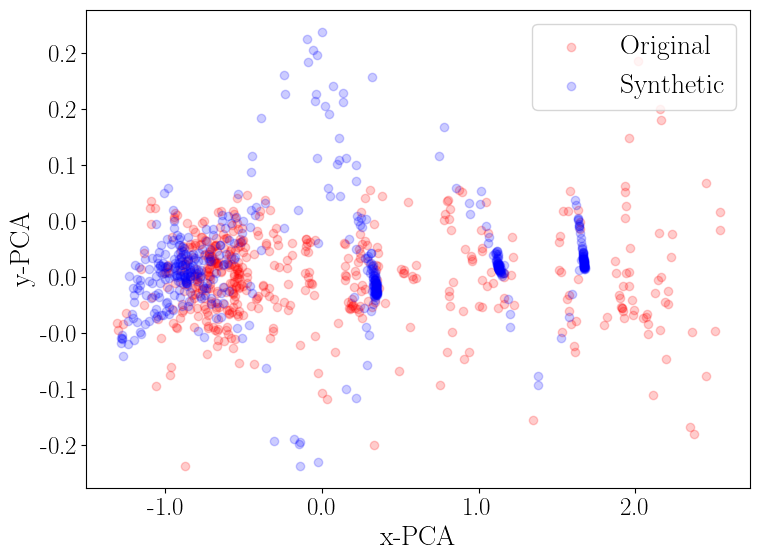

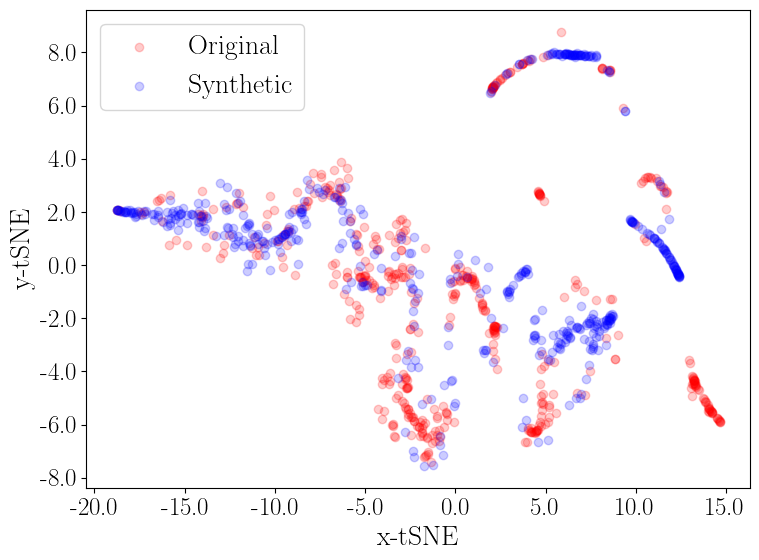

In [65]:
from matplotlib.ticker import FuncFormatter
def format_ticks_with_two_decimals(x, pos):
    return f'{x:.1f}'
set_plot_formatting(font_size=20, bold_axis_labels=True)
# Plot 3 - PCA plot (Scatter Plot)
fig3, ax3_new = plt.subplots(figsize=(8, 6))
for collection in ax3.collections:
    offsets = collection.get_offsets()
    ax3_new.scatter(offsets[:, 0], offsets[:, 1], label=collection.get_label(), alpha=collection.get_alpha(), color=collection.get_facecolor())
ax3_new.set_xlabel('x-PCA')
ax3_new.set_ylabel('y-PCA')
ax3_new.legend(loc='best')
ax3_new.xaxis.set_major_formatter(FuncFormatter(format_ticks_with_two_decimals))
ax3_new.yaxis.set_major_formatter(FuncFormatter(format_ticks_with_two_decimals))
plt.tight_layout()
plt.savefig('stocksPCA.pdf', format='pdf',  bbox_inches='tight')  # Save as a separate plot

set_plot_formatting(font_size=20, bold_axis_labels=True)
# Plot 4 - t-SNE plot (Scatter Plot)
fig4, ax4_new = plt.subplots(figsize=(8, 6))
colors = ['tab:blue', 'tab:red']
for i, collection in enumerate(ax4.collections):
    offsets = collection.get_offsets()
    ax4_new.scatter(offsets[:, 0], offsets[:, 1], label=collection.get_label(), alpha=collection.get_alpha(), color=collection.get_facecolor())
ax4_new.set_xlabel('x-tSNE')
ax4_new.set_ylabel('y-tSNE')
ax4_new.legend(loc='best')

ax4_new.xaxis.set_major_formatter(FuncFormatter(format_ticks_with_two_decimals))
ax4_new.yaxis.set_major_formatter(FuncFormatter(format_ticks_with_two_decimals))

plt.tight_layout()
plt.savefig('stocksTSNE.pdf', format='pdf', bbox_inches='tight')  # Save as a separate plot
plt.show()

#### CKD Data

In [ ]:
# Load the figure from the .pkl file
#Insert the path to the .pkl file HERE vvv
with open(r"C:\Users\benba\OneDrive\Desktop\Oxford\MMSC\Thesis\Good Pkl files\test_e50000_seq24_stocks.pdf.pkl", 'rb') as f:  # Replace 'your_figure.pkl' with your actual .pkl file name
    fig = pickle.load(f)
plt.close(fig)  # Close the loaded figure to avoid displaying it
ax1, ax2, ax3, ax4 = fig.axes

In [ ]:
set_plot_formatting(font_size=20, use_tex=False)

# Plot 1 - Original Data (Multiple Lines)
num_lines = len(ax1.get_lines())
colors = [cmap(i / (num_lines - 1)) for i in range(num_lines)]
fig1, ax1_new = plt.subplots()
for i, line in enumerate(ax1.get_lines()):
    ax1_new.plot(line.get_xdata(), line.get_ydata(),linewidth=0.5, label=line.get_label(), color='red')#colors[i])#line.get_color())
ax1_new.set_xlabel(ax1.get_xlabel())
ax1_new.set_ylabel(ax1.get_ylabel())

plt.tight_layout()
#plt.savefig('testkpkl.pdf',format='pdf')  # Save as a separate plot
plt.show()  # Display the individual plots if needed

In [ ]:
from matplotlib.ticker import FuncFormatter
def format_ticks_with_two_decimals(x, pos):
    return f'{x:.1f}'
set_plot_formatting(font_size=20, bold_axis_labels=True)
# Plot 3 - PCA plot (Scatter Plot)
fig3, ax3_new = plt.subplots(figsize=(8, 6))
for collection in ax3.collections:
    offsets = collection.get_offsets()
    ax3_new.scatter(offsets[:, 0], offsets[:, 1], label=collection.get_label(), alpha=collection.get_alpha(), color=collection.get_facecolor())
ax3_new.set_xlabel('x-PCA')
ax3_new.set_ylabel('y-PCA')
ax3_new.legend(loc='best')
ax3_new.xaxis.set_major_formatter(FuncFormatter(format_ticks_with_two_decimals))
ax3_new.yaxis.set_major_formatter(FuncFormatter(format_ticks_with_two_decimals))
plt.tight_layout()
plt.savefig('stocksPCA.pdf', format='pdf',  bbox_inches='tight')  # Save as a separate plot

set_plot_formatting(font_size=20, bold_axis_labels=True)
# Plot 4 - t-SNE plot (Scatter Plot)
fig4, ax4_new = plt.subplots(figsize=(8, 6))
colors = ['tab:blue', 'tab:red']
for i, collection in enumerate(ax4.collections):
    offsets = collection.get_offsets()
    ax4_new.scatter(offsets[:, 0], offsets[:, 1], label=collection.get_label(), alpha=collection.get_alpha(), color=collection.get_facecolor())
ax4_new.set_xlabel('x-tSNE')
ax4_new.set_ylabel('y-tSNE')
ax4_new.legend(loc='best')

ax4_new.xaxis.set_major_formatter(FuncFormatter(format_ticks_with_two_decimals))
ax4_new.yaxis.set_major_formatter(FuncFormatter(format_ticks_with_two_decimals))

plt.tight_layout()
plt.savefig('stocksTSNE.pdf', format='pdf', bbox_inches='tight')  # Save as a separate plot
plt.show()